In [1]:
# Importing libraries and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv
import os

In [2]:
# Study data files
disney_raw_data = "disney_movies_total_gross.csv"

# Read data files
disney_df = pd.read_csv(disney_raw_data)
disney_df.head(5)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [3]:
disney_df.columns = ["Movie", "Release Date", "Genre", "Rating", "Total Gross", "Inflated Gross"]
disney_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [4]:
# Making a array of genres
genres = disney_df['Genre'].unique()
genres

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [5]:
disney_df['Year']= ""
disney_df['Year'] = disney_df['Release Date'].astype(str).str[0:4]
disney_df
#df['D'] = df['B'].astype(str).str[0]
#disney_df['Year']= disney_df("Release Date"()[0:4])

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950
...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2016
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2016
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2016
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2016


In [6]:
disney_count = pd.DataFrame(disney_df.groupby('Genre').count()['Movie'])
disney_count

,Movie
Genre,
Action,40
Adventure,129
Black Comedy,3
Comedy,182
Concert/Performance,2
Documentary,16
Drama,114
Horror,6
Musical,16


In [23]:
# Group genre with average inflated gross
avg_gross_per_genre = pd.DataFrame(disney_df.groupby('Genre').mean()['Inflated Gross'])
avg_gross_per_genre['Inflated Gross'] = avg_gross_per_genre['Inflated Gross'].astype('int64')

            #avg_gross_clean = round((avg_gross_per_genre),1)   
            #avg_gross_clean
avg_gross_per_genre['Million Gross'] = avg_gross_per_genre['Inflated Gross']/1000000
avg_gross_per_genre

,Inflated Gross,Million Gross
Genre,,
Action,137473419,137.473419
Adventure,190397412,190.397412
Black Comedy,52243491,52.243491
Comedy,84667730,84.667730
Concert/Performance,57410839,57.410839
Documentary,12718026,12.718026
Drama,71893021,71.893021
Horror,23413848,23.413848
Musical,603597861,603.597861


Text(0, 0.5, 'Average Inflated Gross (1e8)')

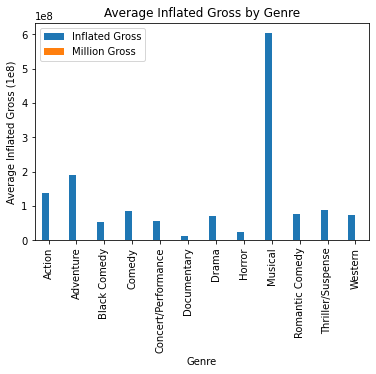

In [29]:
#Bar graph Genre vs Inflated Gross
avg_gross_per_genre.plot.bar()
plt.title('Average Inflated Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Inflated Gross (1e8)')

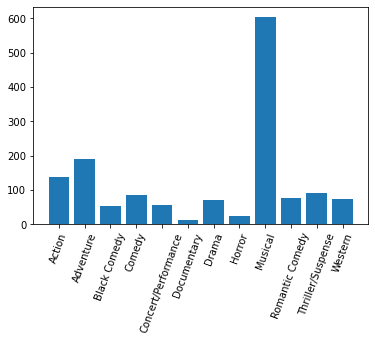

In [33]:
plt.bar(avg_gross_per_genre.index,avg_gross_per_genre['Million Gross'])
#x_axis = np.arange(len(avg_gross_per_genre.index))  For working with the tick marks
tick_locations = [value +1  for value in x_axis]

plt.xticks(rotation=70)

plt.title("")
plt.xlabel("")
plt.ylabel("")


plt.show()

In [13]:
# Count amount of movies per rating
avg_gross_per_rating = pd.DataFrame(disney_df.groupby('Rating').count()['Movie'])
avg_gross_per_rating.columns = ['Total Movies']
avg_gross_per_rating

,Total Movies
Rating,
G,86
Not Rated,3
PG,187
PG-13,145
R,102


In [15]:
# Group rating with average inflated gross
avg_rating_clean = pd.DataFrame(disney_df.groupby('Rating').mean()['Inflated Gross'])
avg_rating_clean['Inflated Gross'] = avg_rating_clean['Inflated Gross'].astype('int64')

#avg_rating_clean = round((avg_rating),1)
avg_rating_clean

,Inflated Gross
Rating,
G,291260995
Not Rated,299873412
PG,101541433
PG-13,102948584
R,55305805


Text(0, 0.5, 'Average Inflated Gross (1e8)')

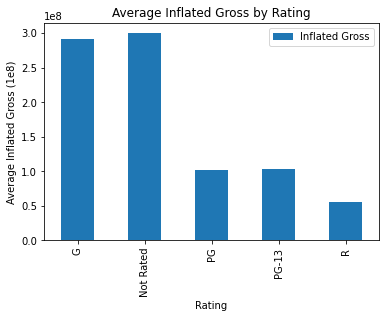

In [16]:
#Bar Graph   Rating vs Inflated Gross
avg_rating_clean.plot.bar()
plt.title('Average Inflated Gross by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Inflated Gross (1e8)')

In [26]:


year_df = pd.DataFrame(disney_df.groupby('Year').mean()['Inflated Gross'])

year_df['Inflated Gross'] = year_df['Inflated Gross'].astype('int64')

#year_mean = round((year),1)
year_df



#avg_gross_per_genre = pd.DataFrame(disney_df.groupby('Genre').mean()['Inflated Gross'])
#avg_gross_clean = round((avg_gross_per_genre),1)
#avg_gross_clean

,Inflated Gross
Year,
1937,5228953251
1940,2187659930
1946,1078510579
1950,920608730
1954,528279994
1955,1236035515
1959,21505832
1961,599268906
1962,109581646


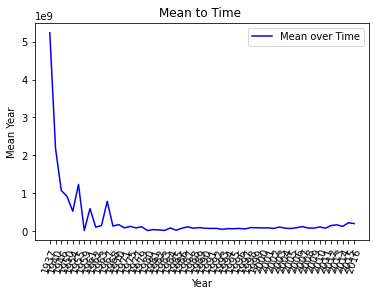

In [35]:
## Maybe we can do this by decade as this is really hard to read###

years = year_df.index
gross_mean = year_df['Inflated Gross'].values

year_line= plt.plot(years, gross_mean, color="blue",label="Mean over Time")
plt.title("Mean to Time ")
plt.xlabel("Year")
plt.xticks(rotation=70)
plt.ylabel("Mean Year")
plt.legend()
plt.show()